In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Read Data

In [113]:
traffic=pd.read_csv('../data/train_2.csv')

key=pd.read_csv('../data/key_2.csv')

sub=pd.read_csv('../data/sample_submission_2.csv')

In [114]:
traffic.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


## Extract meta data

In [115]:
names=traffic.Page.values

langs=[]
access=[]
vtype=[]
entity=[]
for n in names:
    elements=n.split('_')
    langs.append(elements[-3])
    access.append(elements[-2])
    vtype.append(elements[-1])
    entity.append(' '.join(elements[:-3]))

### Visitor types

In [116]:
np.unique(vtype)

array(['all-agents', 'spider'], dtype='<U10')

### Access types

In [117]:
np.unique(access)

array(['all-access', 'desktop', 'mobile-web'], dtype='<U10')

### Domain types (Language types)

There are only three types of domains, while the language is the first element in '.wikipedia.org' type.

7 languages (de,en,es,fr,ja,ru,zh)

In [118]:
add_type1=sum(list(map((lambda address: '.wikipedia.org' in address), langs)))
add_type2=sum(list(map((lambda address: 'www.mediawiki.org' in address), langs)))
add_type3=sum(list(map((lambda address: 'commons.wikimedia.org' in address), langs)))

In [119]:
assert (add_type1+add_type2+add_type3)==len(langs),'more than 3 types of http address'

In [120]:
np.unique(langs)

array(['commons.wikimedia.org', 'de.wikipedia.org', 'en.wikipedia.org',
       'es.wikipedia.org', 'fr.wikipedia.org', 'ja.wikipedia.org',
       'ru.wikipedia.org', 'www.mediawiki.org', 'zh.wikipedia.org'],
      dtype='<U21')

### Example of entities

In [121]:
np.random.choice(entity,15)

array(['Liga de Campeones de la UEFA 2016-17', '西拉米',
       'Especial:FuentesDeLibros', 'CrossFit',
       'Pirates of the Caribbean – Am Ende der Welt',
       'Tous en scène (film, 2016)',
       'Anexo:Episodios de Good Luck Charlie', 'MediaWiki/pl',
       'Manchester United F.C.', 'Liste de légumes', '加拿大',
       'Офицеры (фильм)', 'Captain Phillips', 'OOjs UI',
       'Genie (feral child)'], dtype='<U230')

## Build new dataframe

In [122]:
traffic['langs']=langs
traffic['vtype']=vtype
traffic['access']=access
traffic['entity']=entity


In [128]:
traffic.drop(['Page'],axis=1,inplace=True)

In [129]:
traffic.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,langs,vtype,access,entity
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,16.0,27.0,29.0,23.0,54.0,38.0,zh.wikipedia.org,spider,all-access,2NE1
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,54.0,25.0,26.0,23.0,13.0,81.0,zh.wikipedia.org,spider,all-access,2PM
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,zh.wikipedia.org,spider,all-access,3C
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,6.0,16.0,19.0,30.0,38.0,4.0,zh.wikipedia.org,spider,all-access,4minute
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,zh.wikipedia.org,spider,all-access,52 Hz I Love You


### Save

In [132]:
traffic.to_csv('../data/cl_traffic.csv',index=False)

In [134]:
# pd.read_csv('data/cl_traffic.csv').head()

## Exploratory analysis

In [107]:
gpb_lang=traffic.groupby(['langs']).sum()
gpb_lang

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
langs,,,,,,,,,,,,,,,,,,,,,
commons.wikimedia.org,1140821.0,1178130.0,1150547.0,951317.0,1058036.0,1210059.0,1261832.0,1397039.0,1211829.0,1160388.0,...,3478284.0,1935325.0,2295477.0,2152909.0,1773990.0,4700532.0,10787037.0,1982500.0,2102161.0,1784866.0
de.wikipedia.org,13260519.0,13079896.0,12554042.0,11520379.0,13392347.0,14741758.0,14296292.0,14505194.0,13964778.0,13014478.0,...,13354788.0,11239489.0,12296329.0,12470576.0,12137801.0,12373349.0,14257897.0,11705679.0,10902535.0,12183544.0
en.wikipedia.org,84712190.0,84438545.0,80167728.0,83463204.0,86198637.0,92809436.0,87838054.0,82880196.0,84798911.0,84319456.0,...,78208379.0,83435526.0,98443347.0,99433166.0,93005206.0,92862934.0,97701973.0,74417827.0,71919663.0,75370705.0
es.wikipedia.org,15278553.0,14601013.0,13427632.0,12606538.0,13710356.0,15625554.0,15230654.0,14781870.0,14502906.0,13184481.0,...,14162585.0,11576049.0,14226139.0,17040349.0,18046011.0,17410117.0,16786454.0,14396083.0,11635387.0,13516782.0
fr.wikipedia.org,8458638.0,8512952.0,8186030.0,8749842.0,8590493.0,8949799.0,8650800.0,8491533.0,8403646.0,7930703.0,...,8902006.0,8494891.0,9044680.0,8173372.0,7982995.0,9222511.0,9067156.0,8004593.0,8444916.0,9111985.0
ja.wikipedia.org,11863200.0,13620792.0,12305383.0,15456239.0,14827204.0,12920547.0,12568828.0,12492787.0,12178258.0,12652904.0,...,13059364.0,12608585.0,13146704.0,11785678.0,11350487.0,11695723.0,12963373.0,11691175.0,12497823.0,13938056.0
ru.wikipedia.org,9463854.0,9627643.0,8923463.0,8393214.0,8938528.0,9628896.0,9408180.0,9364117.0,9592309.0,10984872.0,...,9548565.0,9472178.0,9808559.0,9445196.0,11480567.0,14971353.0,10460920.0,9034957.0,9198499.0,10069651.0
www.mediawiki.org,349713.0,383680.0,325714.0,308756.0,338485.0,391895.0,433312.0,372333.0,331655.0,399316.0,...,1206307.0,899106.0,1295603.0,1221348.0,1295636.0,4123833.0,3500817.0,502495.0,414084.0,428533.0
zh.wikipedia.org,4144988.0,4151189.0,4123659.0,4163448.0,4441286.0,4464290.0,4459421.0,4575842.0,4547843.0,4727889.0,...,4762780.0,5219896.0,5505562.0,5068912.0,5117895.0,4993794.0,5205657.0,5019361.0,5244444.0,5459827.0


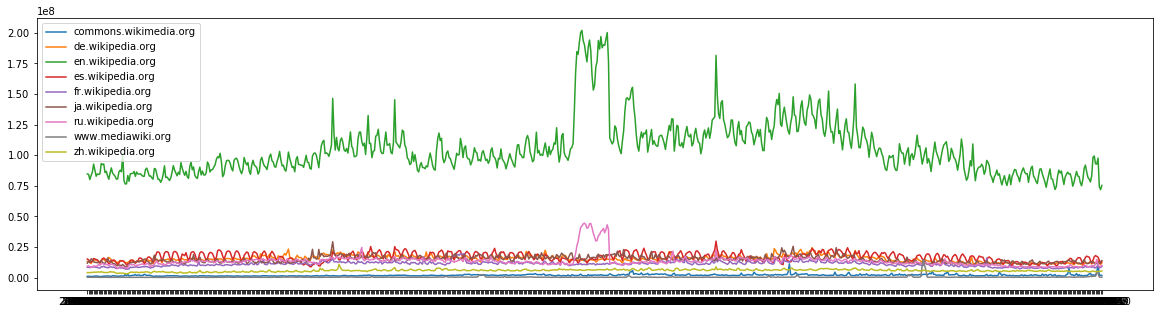

In [108]:
plt.figure(figsize=(20,5))
for i in range(len(gpb_lang)):
    language=gpb_lang.index[i]
    traffic=gpb_lang.iloc[i,:]
    plt.plot(traffic,label=language)
plt.legend()